Making ChoicesMaking ChoicesMaking Choices# 🌎 GPGN268 - Geophysical Data Analysis
- **Instructor:** Bia Villas Boas  
- **TA:** Seunghoo Kim

## Python Tutorial 7:  More on Numpy arrays
#### 🎯 Learning Objectives from this Tutorial:
- Create numpy arrays
- Use booleans to select specific values
- Find indices where the values of an array matches a certain condition

In [16]:
import numpy as np
import matplotlib.pyplot as plt

#### Creating arrays

There are several ways you can create a Numpy array

In [4]:
# create an array from a list
a = np.array([9,0,2,1,0])
a

array([9, 0, 2, 1, 0])

In [10]:
# create an array of zeros with 9 rows and 3 columns
b = np.zeros((9,3))
print(b.shape)
print(b)

(9, 3)
[[0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]]


In [9]:
# create a 3D array of ones
c = np.ones((3,2,3))
print(c.shape)
print(c)

(3, 2, 3)
[[[1. 1. 1.]
  [1. 1. 1.]]

 [[1. 1. 1.]
  [1. 1. 1.]]

 [[1. 1. 1.]
  [1. 1. 1.]]]


In [11]:
# using arange
np.arange(5)

array([0, 1, 2, 3, 4])

arange is left inclusive, right exclusive, just like range, but also works with floating-point numbers

In [12]:
np.arange(2,4,0.25)

array([2.  , 2.25, 2.5 , 2.75, 3.  , 3.25, 3.5 , 3.75])

A frequent need is to generate an array of N numbers, evenly spaced between two values. That is what linspace is for.

In [13]:
np.linspace(2,4,10)

array([2.        , 2.22222222, 2.44444444, 2.66666667, 2.88888889,
       3.11111111, 3.33333333, 3.55555556, 3.77777778, 4.        ])

In [14]:
# similarly for a sequance of number that are log spaced
np.logspace(1,2,10)

array([ 10.        ,  12.91549665,  16.68100537,  21.5443469 ,
        27.82559402,  35.93813664,  46.41588834,  59.94842503,
        77.42636827, 100.        ])

Numpy also has some utilities for helping us generate multi-dimensional arrays. meshgrid creates 2D arrays out of a combination of 1D arrays.

In [15]:
x = np.linspace(-2*np.pi, 2*np.pi, 100)
y = np.linspace(-np.pi, np.pi, 50)
xx, yy = np.meshgrid(x, y)
xx.shape, yy.shape

((50, 100), (50, 100))

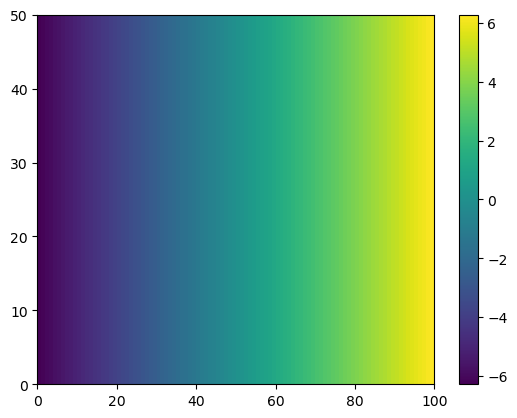

In [18]:
plt.pcolormesh(xx)
plt.colorbar()

#### Indexing

Basic indexing for numpy arrays is similar to lists

In [19]:
# get some individual elements of xx
xx[0,0], xx[-1,-1], xx[3,-5]

(-6.283185307179586, 6.283185307179586, 5.775453161144872)

In [20]:
# get some whole rows and columns
xx[0].shape, xx[:,-1].shape

((100,), (50,))

In [21]:
# get some slices
xx[3:10,30:40].shape

(7, 10)

#### Appliying conditionals to arrays

Sometime we want to identify values in an array that satisfy a given criterium. For example, we might wanna identify all negative numbers in an array

In [30]:
a = np.array([-1, 2, 3.2, -9, 10])

In [31]:
a < 0

array([ True, False, False,  True, False])

The conditional above returns an array of booleans. Surprisingly, we can use booleans as indices for an array.  

In [32]:
idx = a < 0
print(idx)

[ True False False  True False]


In [33]:
a[idx]

array([-1., -9.])

the code above will select the elements of the array `a` only in places where the boolean variable `idx` is true (i.e., where the values are negative). We can also use booleans as indices directly (without saving in a separate variable)

In [34]:
a[a<0]

array([-1., -9.])

We can use this type of operation, for example, to clean up our data and manipulate it in all sorts of clever ways. For example, we might want to replace the negative values of the array by NaNs. 

In [35]:
print('a before:', a)
a[a<0] = np.nan
print('a after:', a)

a before: [-1.   2.   3.2 -9.  10. ]
a after: [ nan  2.   3.2  nan 10. ]


Lets say we have an array of angles that we would like to convert from (0, 360) to (-180, 180)

In [41]:
angles = np.array([0., 45., 90., 135., 180., 225., 270., 315.])
print('angles before:', angles)
angles[angles>180] = angles[angles>180] - 360
print('angles after:', angles)

angles before: [  0.  45.  90. 135. 180. 225. 270. 315.]
angles after: [   0.   45.   90.  135.  180. -135.  -90.  -45.]


#### Searching for a criterium

Numpy has a function `where`, which tells us the indices matching a given criterium. For example, we we want to find what are the indices where the values of `angle` are negative, we can do:

In [42]:
np.where(angles<0)

(array([5, 6, 7]),)

### 🔎 Key Points
- Use arange and linspace to create arraya
- Booleans can be used as indices
- `where` gives you the indices where a given condition is satisfied